In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import config as c
import utils as u



sns.set_context("talk")

In [2]:
tdf = u.load_trials_df()
tdf = u.compute_days_relative_to_stage(tdf, 5)

Loading days data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


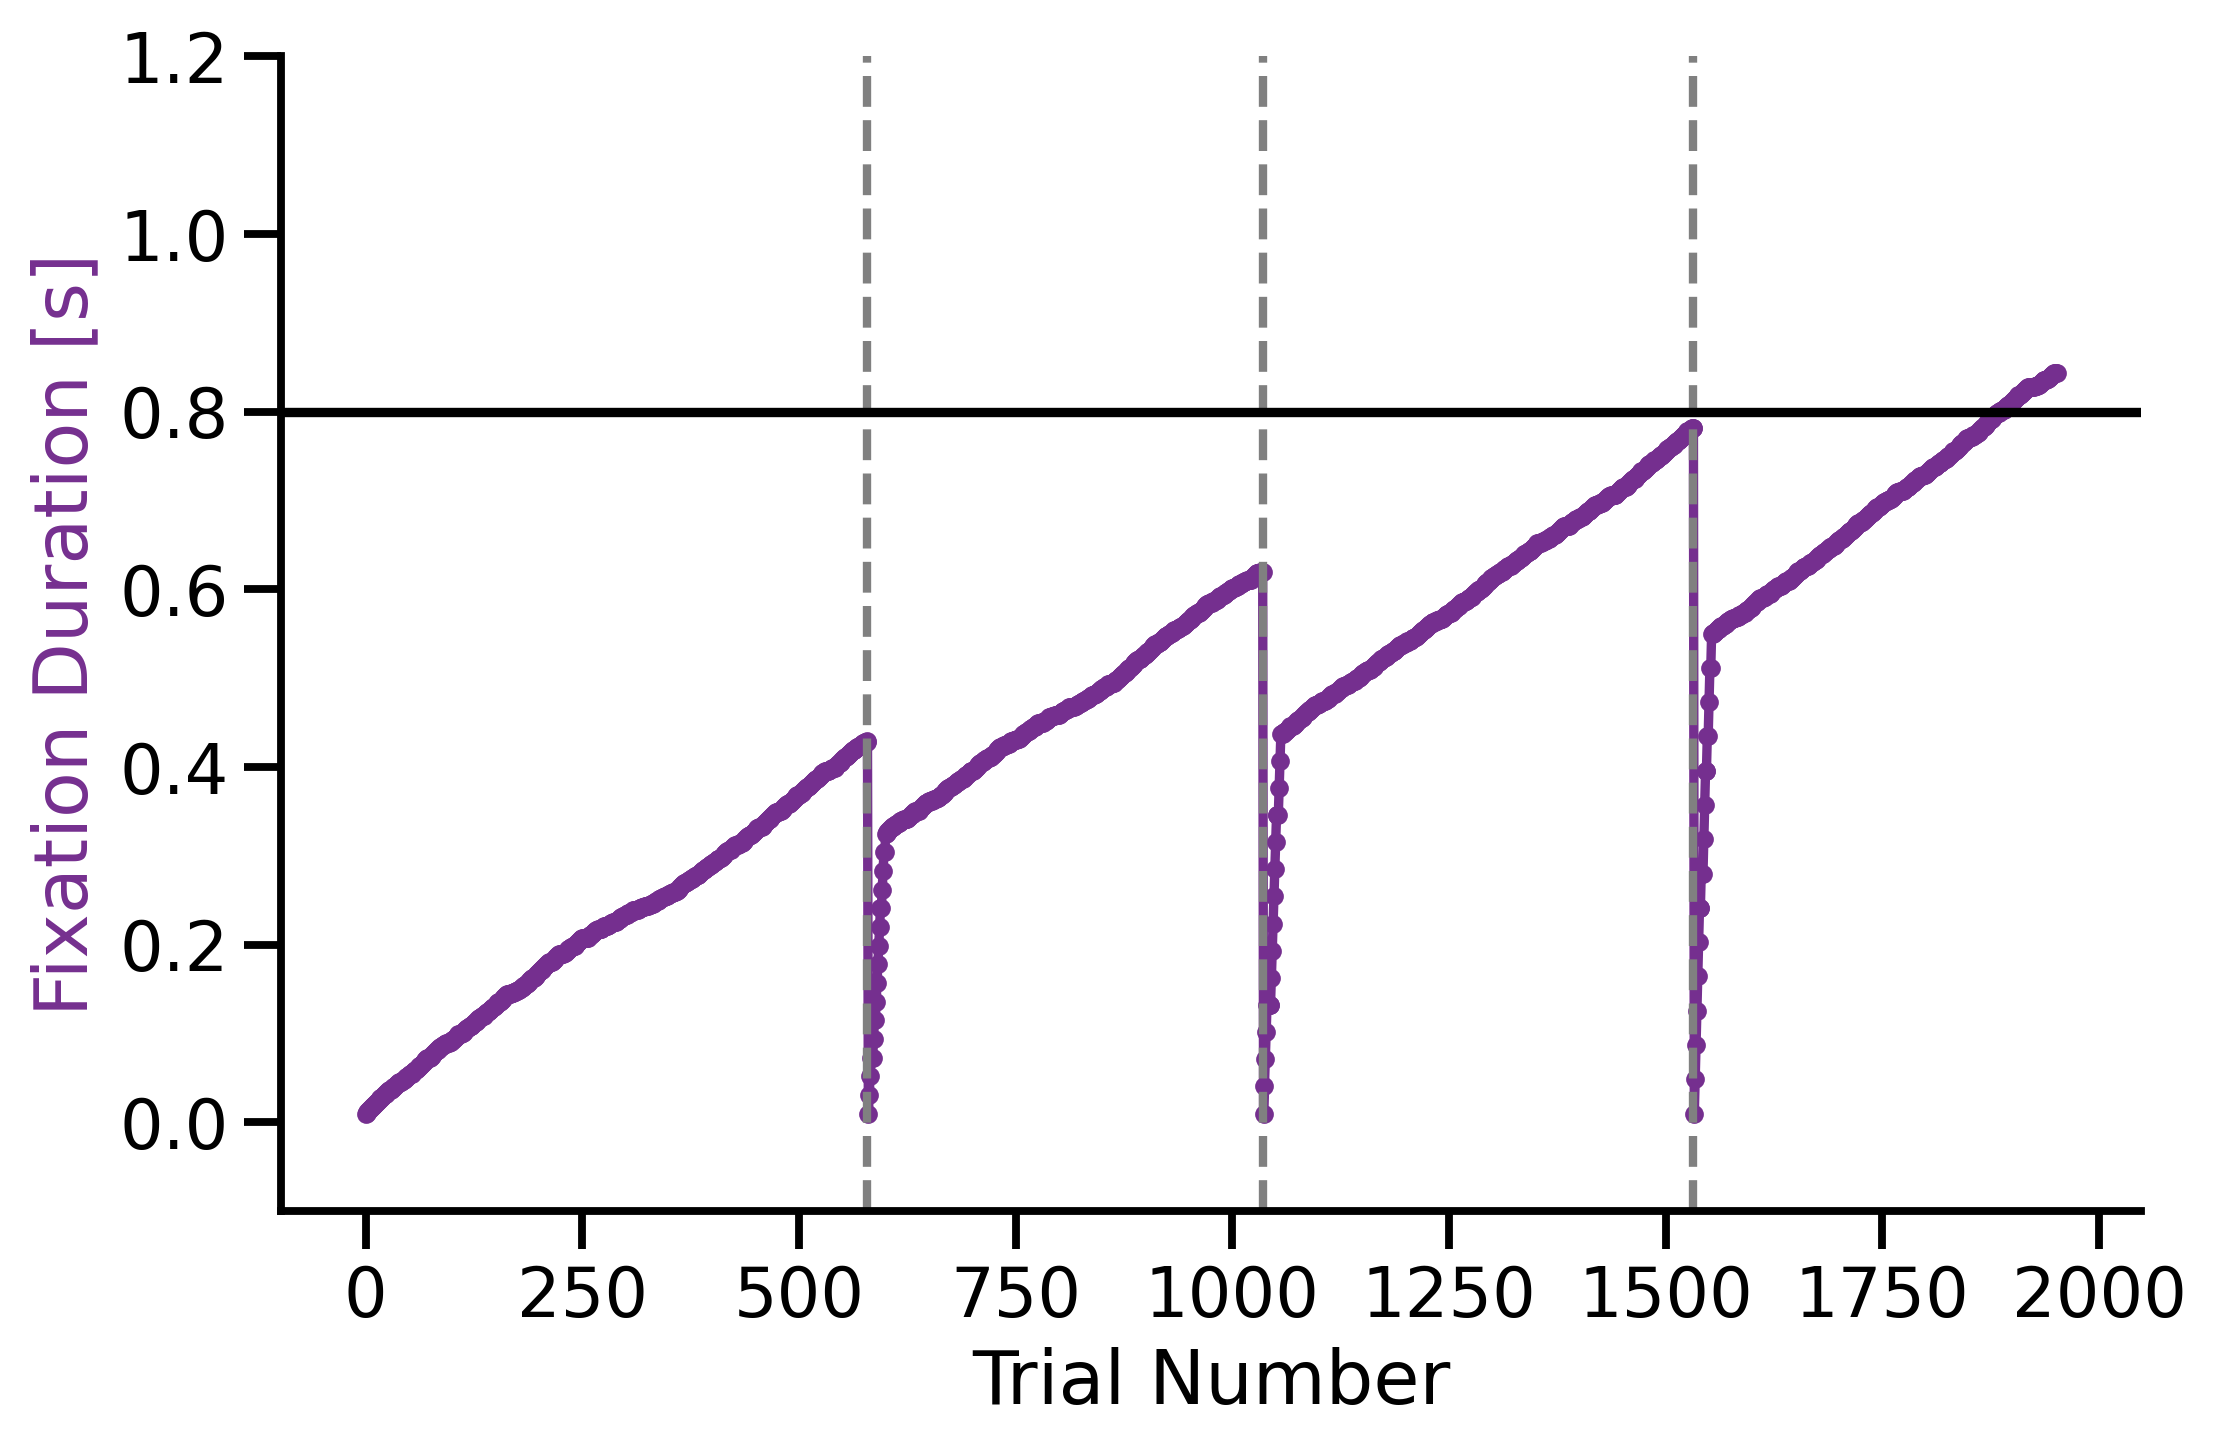

In [3]:
V1_ANIMAL = "R042"
df = tdf.query("animal_id == @V1_ANIMAL and stage >=5").copy()
df["total_trials"] = range(len(df))
df =df.query("days_relative_to_stage_5 < 4")

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
sns.lineplot(
    data=df,
    x="total_trials",
    y="fixation_dur",
    color=c.V1_COLOR,
    marker=".",
    markeredgecolor="none",
)

# Find the unique session start points
session_starts = df.groupby("sess_id")["total_trials"].min() - 1

# Plot a vertical line at the start of each new session
for session_start in session_starts:
    if session_start > 0:
        ax.axvline(x=session_start, color="gray", linestyle="--", lw=2)

ax.set(xlabel="Trial Number", title="", ylim=(-0.1, 1.2))
ax.axhline(0.8, color="black")
ax.set_ylabel("Fixation Duration [s]", color=c.V1_COLOR)

sns.despine(ax=ax)

c.save_fig(fig, "fig1_v1_fix_growth")


In [4]:
pdf = u.load_poke_df()
pdf = u.compute_days_relative_to_stage(pdf, 5)

Loading poke data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


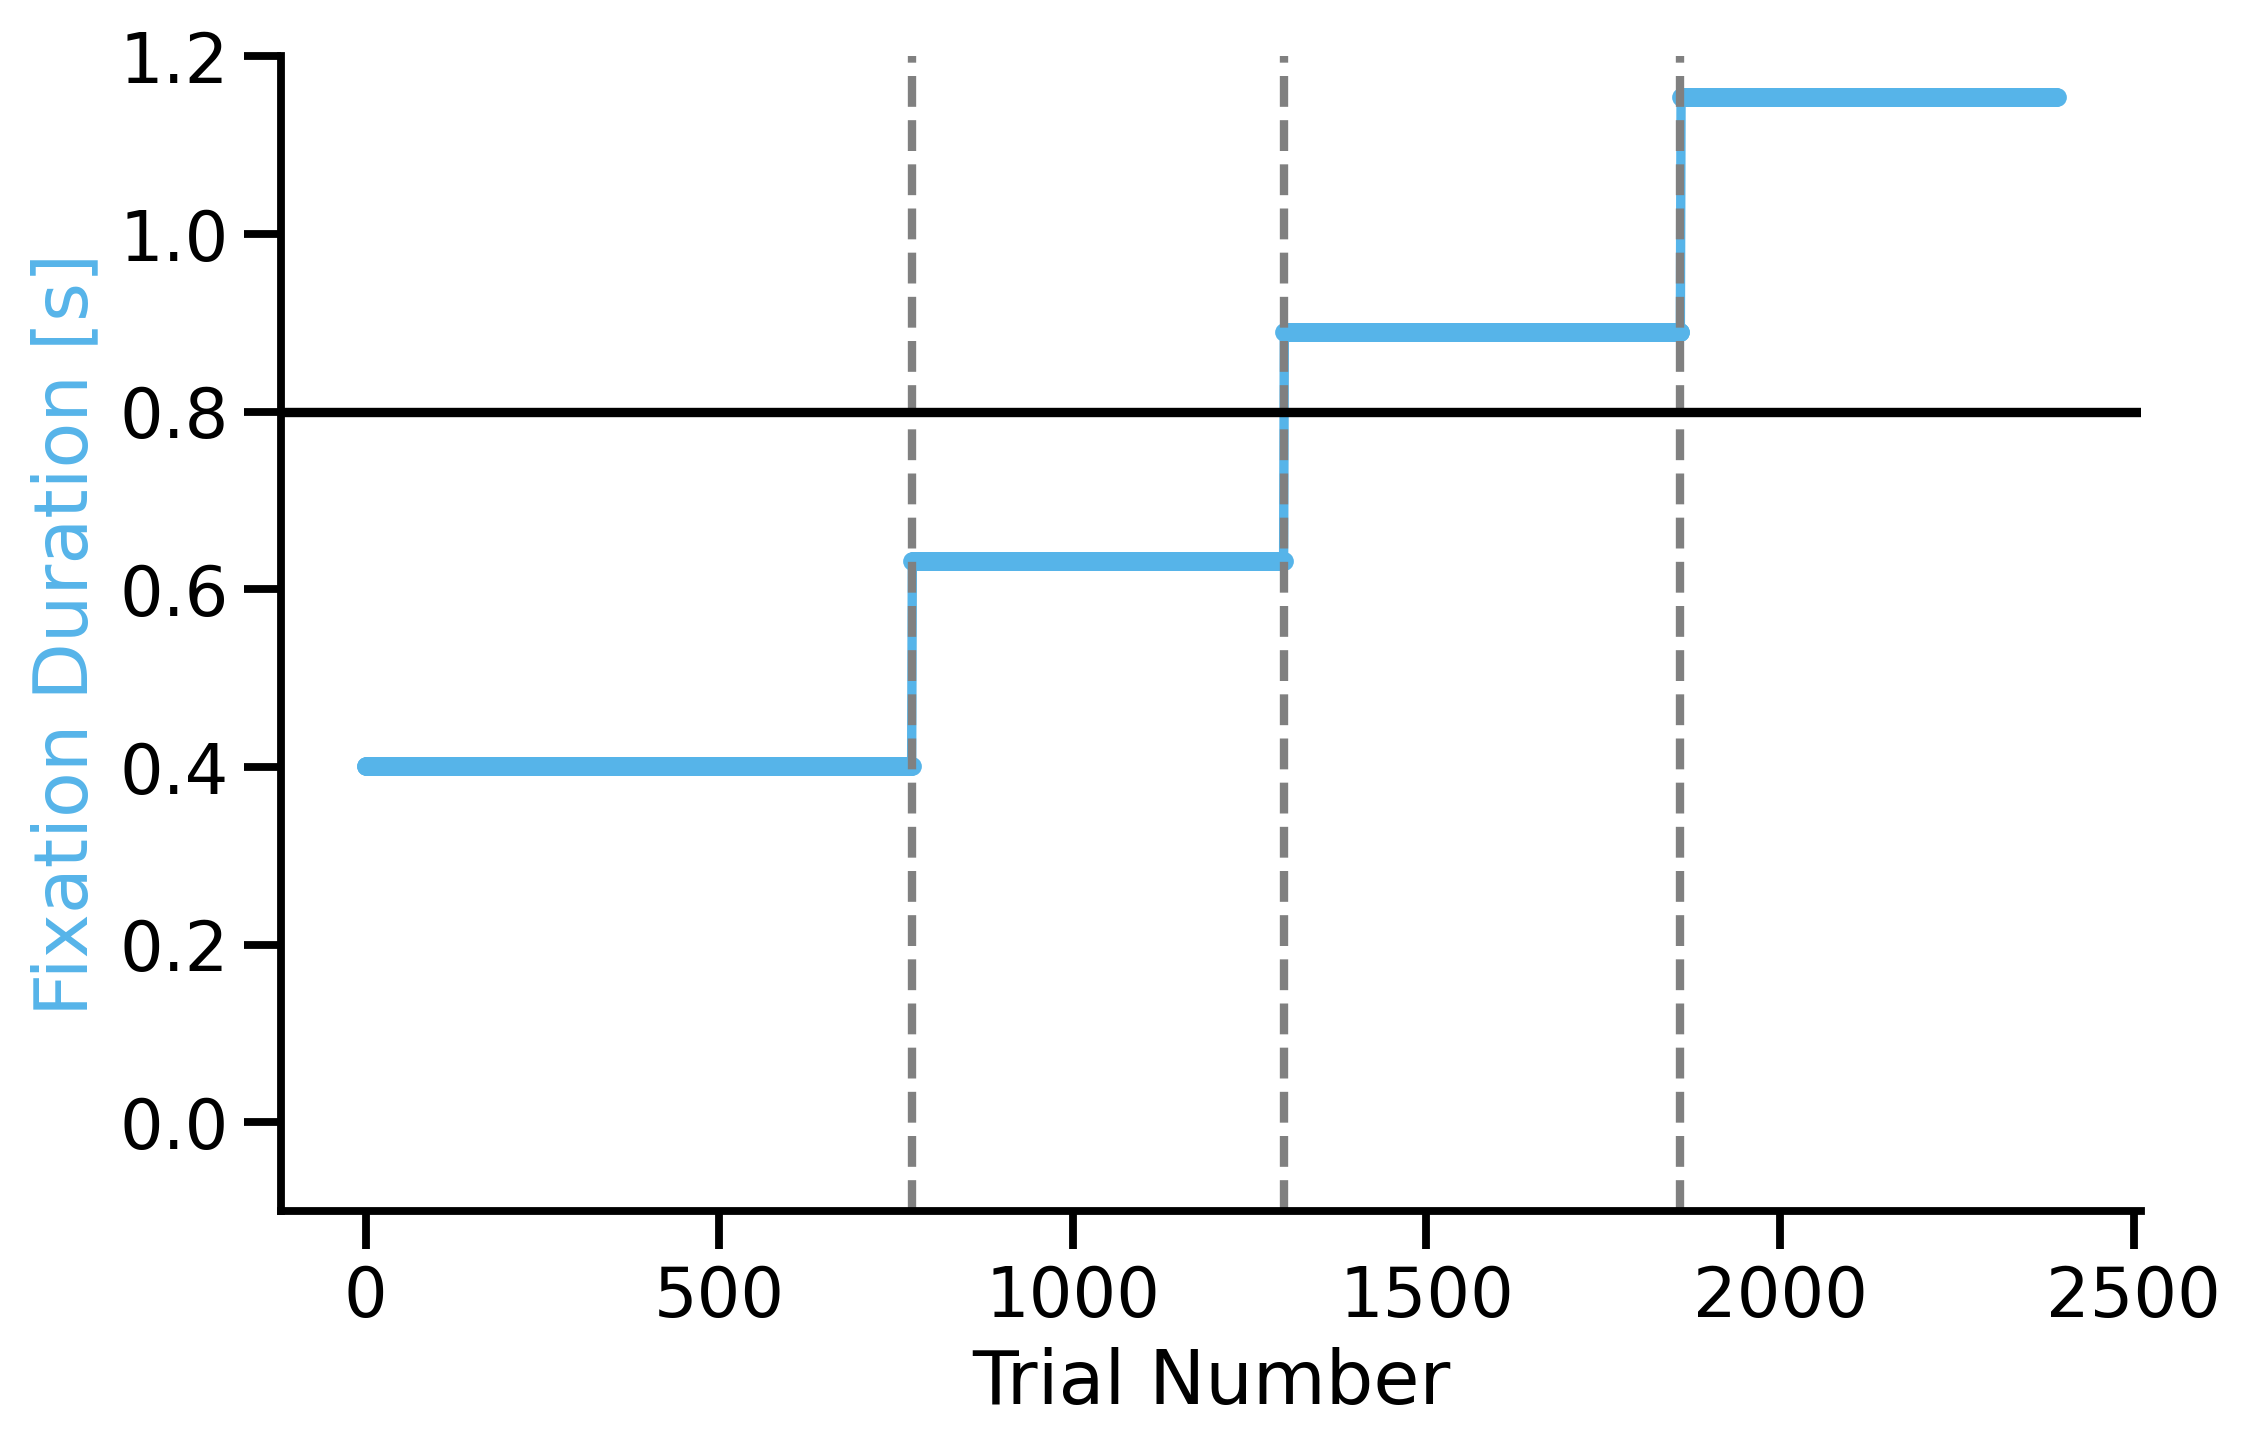

In [5]:
V2_ANIMAL = "R043"
df = pdf.query("animal_id == @V2_ANIMAL and stage >=5").copy().sort_values(by="days_relative_to_stage_5", ascending=True)
df["total_trials"] = range(len(df))
df =df.query("days_relative_to_stage_5< 4")

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
sns.lineplot(
    data=df,
    x="total_trials",
    y="fixation_dur",
    color=c.V2_COLOR,
    marker=".",
    markeredgecolor="none",
)

# Find the unique session start points
session_starts = df.groupby("sessid")["total_trials"].min() - 1

# Plot a vertical line at the start of each new session
for session_start in session_starts:
    if session_start > 0:
        ax.axvline(x=session_start, color="gray", linestyle="--", lw=2)

ax.set(xlabel="Trial Number", title="", ylim=(-0.1, 1.2))
ax.axhline(0.8, color="black")
ax.set_ylabel("Fixation Duration [s]", color=c.V2_COLOR)

sns.despine(ax=ax)

c.save_fig(fig, "fig1_v2_fix_growth")